# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

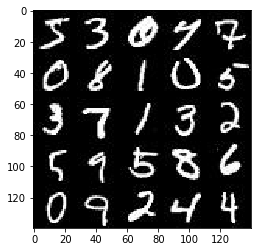

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

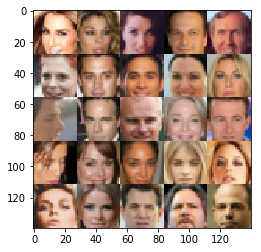

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], name='input_real')
    inputs_z = tf.placeholder(tf.float32, [None, z_dim], name='input_z')
    lr = tf.placeholder(tf.float32, name='learning_rate')
    
    return inputs_real, inputs_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Functionc
    alpha = 0.2
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # Layer 1
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, 
                              padding='same', 
                              kernel_initializer=tf.contrib.layers.xavier_initializer())
        x1 = tf.maximum(alpha * x1, x1)
                
        
        # Layer 2
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, 
                              padding='same', 
                              kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        
        # Layer 3
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, 
                              padding='same', 
                              kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        
        # Flatten
        flat = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
     
        # Fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)
        # Reshape for transpose conv
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        # Layer 2
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        # Layer 3
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        # Output
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        
        out = tf.tanh(logits)
    
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real)*0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_real)))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))
    
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights/biases
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # Optimizer
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1). minimize(d_loss, var_list=d_vars)
   
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1). minimize(g_loss, var_list=g_vars)
    
    
    return d_train_opt, g_train_opt



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    ## Build & Train GAN ##
    
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = data_shape[3]
    num_batches = data_shape[0] // batch_size
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                steps +=1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run Optimizers
                _ = sess.run(d_train_opt, feed_dict = {input_real: batch_images, input_z: z_sample})
                _ = sess.run(g_train_opt, feed_dict = {input_z: z_sample, lr: learning_rate})
                
                # Print progress
                if steps % show_every == 0:
                    show_generator_output(sess=sess, 
                                          n_images = n_images, 
                                          input_z = input_z, 
                                          out_channel_dim=image_channels, 
                                          image_mode=data_image_mode)
                    
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: z_sample, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.4f}...".format(train_loss_d),
                         "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [23]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

KeyboardInterrupt: 

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.8062... Generator Loss: 2.5812
Epoch 1/1... Discriminator Loss: 1.3130... Generator Loss: 1.1177
Epoch 1/1... Discriminator Loss: 0.7842... Generator Loss: 1.8708
Epoch 1/1... Discriminator Loss: 0.7361... Generator Loss: 1.7428
Epoch 1/1... Discriminator Loss: 1.0961... Generator Loss: 1.0812
Epoch 1/1... Discriminator Loss: 0.8558... Generator Loss: 1.1768
Epoch 1/1... Discriminator Loss: 0.6014... Generator Loss: 2.7062
Epoch 1/1... Discriminator Loss: 0.9107... Generator Loss: 1.2069
Epoch 1/1... Discriminator Loss: 0.5177... Generator Loss: 2.7411


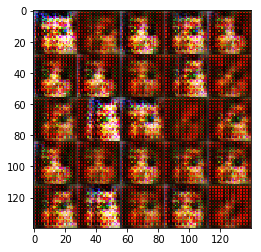

Epoch 1/1... Discriminator Loss: 0.6012... Generator Loss: 5.3103
Epoch 1/1... Discriminator Loss: 1.1128... Generator Loss: 0.9478
Epoch 1/1... Discriminator Loss: 0.7326... Generator Loss: 1.3564
Epoch 1/1... Discriminator Loss: 0.4489... Generator Loss: 4.1071
Epoch 1/1... Discriminator Loss: 1.4647... Generator Loss: 1.4326
Epoch 1/1... Discriminator Loss: 0.9670... Generator Loss: 1.5237
Epoch 1/1... Discriminator Loss: 0.5451... Generator Loss: 2.9544
Epoch 1/1... Discriminator Loss: 0.8073... Generator Loss: 1.6842
Epoch 1/1... Discriminator Loss: 0.7566... Generator Loss: 2.0229
Epoch 1/1... Discriminator Loss: 0.7175... Generator Loss: 1.9946


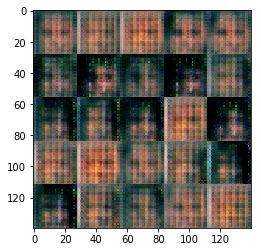

Epoch 1/1... Discriminator Loss: 1.2603... Generator Loss: 0.9498
Epoch 1/1... Discriminator Loss: 0.6585... Generator Loss: 3.0281
Epoch 1/1... Discriminator Loss: 0.9676... Generator Loss: 1.2873
Epoch 1/1... Discriminator Loss: 1.8899... Generator Loss: 0.3530
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.7964
Epoch 1/1... Discriminator Loss: 1.3787... Generator Loss: 0.5149
Epoch 1/1... Discriminator Loss: 1.1948... Generator Loss: 1.2185
Epoch 1/1... Discriminator Loss: 0.9987... Generator Loss: 1.1845
Epoch 1/1... Discriminator Loss: 1.5224... Generator Loss: 1.1240
Epoch 1/1... Discriminator Loss: 1.3693... Generator Loss: 0.7715


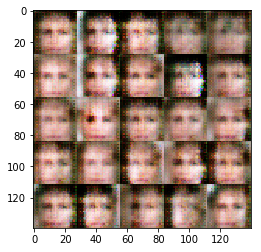

Epoch 1/1... Discriminator Loss: 1.4546... Generator Loss: 0.5938
Epoch 1/1... Discriminator Loss: 1.1452... Generator Loss: 1.1496
Epoch 1/1... Discriminator Loss: 1.2212... Generator Loss: 0.8568
Epoch 1/1... Discriminator Loss: 1.3026... Generator Loss: 1.1776
Epoch 1/1... Discriminator Loss: 1.7342... Generator Loss: 0.6363
Epoch 1/1... Discriminator Loss: 1.0130... Generator Loss: 1.0103
Epoch 1/1... Discriminator Loss: 1.0855... Generator Loss: 1.0858
Epoch 1/1... Discriminator Loss: 1.0787... Generator Loss: 0.9786
Epoch 1/1... Discriminator Loss: 1.2000... Generator Loss: 1.1401
Epoch 1/1... Discriminator Loss: 1.3429... Generator Loss: 1.0572


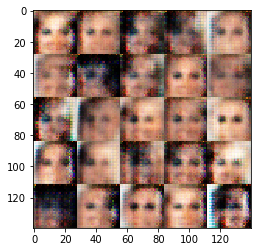

Epoch 1/1... Discriminator Loss: 1.5470... Generator Loss: 0.4340
Epoch 1/1... Discriminator Loss: 1.2145... Generator Loss: 0.8776
Epoch 1/1... Discriminator Loss: 1.3559... Generator Loss: 1.5772
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.7706
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.7228
Epoch 1/1... Discriminator Loss: 0.8738... Generator Loss: 1.3407
Epoch 1/1... Discriminator Loss: 1.3241... Generator Loss: 1.1976
Epoch 1/1... Discriminator Loss: 1.4339... Generator Loss: 0.5130
Epoch 1/1... Discriminator Loss: 1.1748... Generator Loss: 0.9680
Epoch 1/1... Discriminator Loss: 1.4391... Generator Loss: 1.9152


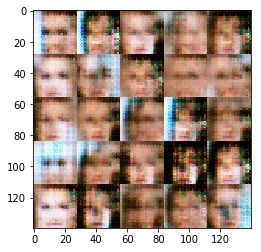

Epoch 1/1... Discriminator Loss: 1.0463... Generator Loss: 1.3755
Epoch 1/1... Discriminator Loss: 1.1272... Generator Loss: 0.7989
Epoch 1/1... Discriminator Loss: 1.2037... Generator Loss: 0.9684
Epoch 1/1... Discriminator Loss: 1.1595... Generator Loss: 1.0843
Epoch 1/1... Discriminator Loss: 1.1821... Generator Loss: 0.9054
Epoch 1/1... Discriminator Loss: 2.0325... Generator Loss: 0.2854
Epoch 1/1... Discriminator Loss: 1.0983... Generator Loss: 1.3164
Epoch 1/1... Discriminator Loss: 1.6253... Generator Loss: 2.7650
Epoch 1/1... Discriminator Loss: 1.0088... Generator Loss: 1.0737
Epoch 1/1... Discriminator Loss: 1.1754... Generator Loss: 1.5592


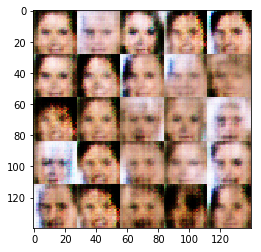

Epoch 1/1... Discriminator Loss: 1.2352... Generator Loss: 0.9618
Epoch 1/1... Discriminator Loss: 1.0872... Generator Loss: 1.3828
Epoch 1/1... Discriminator Loss: 1.4570... Generator Loss: 0.5352
Epoch 1/1... Discriminator Loss: 1.3638... Generator Loss: 0.5470
Epoch 1/1... Discriminator Loss: 1.2468... Generator Loss: 1.6828
Epoch 1/1... Discriminator Loss: 1.2487... Generator Loss: 0.8866
Epoch 1/1... Discriminator Loss: 1.6029... Generator Loss: 0.4990
Epoch 1/1... Discriminator Loss: 1.4130... Generator Loss: 1.0496
Epoch 1/1... Discriminator Loss: 1.0141... Generator Loss: 1.4182
Epoch 1/1... Discriminator Loss: 1.1827... Generator Loss: 0.9142


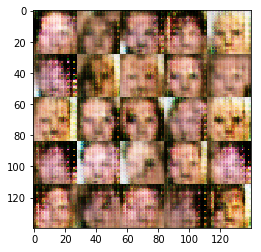

Epoch 1/1... Discriminator Loss: 2.1615... Generator Loss: 3.7686
Epoch 1/1... Discriminator Loss: 1.0096... Generator Loss: 1.7810
Epoch 1/1... Discriminator Loss: 0.8944... Generator Loss: 1.7822
Epoch 1/1... Discriminator Loss: 1.3457... Generator Loss: 2.0562
Epoch 1/1... Discriminator Loss: 1.1858... Generator Loss: 1.1758
Epoch 1/1... Discriminator Loss: 1.0144... Generator Loss: 1.0656
Epoch 1/1... Discriminator Loss: 0.8525... Generator Loss: 1.5454
Epoch 1/1... Discriminator Loss: 1.0331... Generator Loss: 1.3941
Epoch 1/1... Discriminator Loss: 0.9246... Generator Loss: 1.0414
Epoch 1/1... Discriminator Loss: 1.0754... Generator Loss: 1.1435


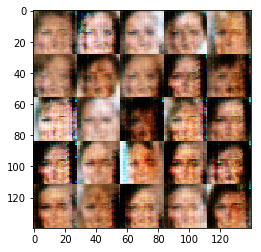

Epoch 1/1... Discriminator Loss: 1.2499... Generator Loss: 2.0407
Epoch 1/1... Discriminator Loss: 1.4908... Generator Loss: 0.8297
Epoch 1/1... Discriminator Loss: 1.6886... Generator Loss: 0.3871
Epoch 1/1... Discriminator Loss: 1.0970... Generator Loss: 1.4312
Epoch 1/1... Discriminator Loss: 1.1286... Generator Loss: 0.8768
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 0.9535
Epoch 1/1... Discriminator Loss: 1.0714... Generator Loss: 1.4801
Epoch 1/1... Discriminator Loss: 0.9756... Generator Loss: 1.6553
Epoch 1/1... Discriminator Loss: 1.9143... Generator Loss: 3.1712
Epoch 1/1... Discriminator Loss: 1.0675... Generator Loss: 1.1192


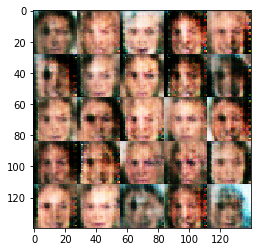

Epoch 1/1... Discriminator Loss: 1.2444... Generator Loss: 0.7011
Epoch 1/1... Discriminator Loss: 1.0728... Generator Loss: 0.8276
Epoch 1/1... Discriminator Loss: 0.9598... Generator Loss: 1.4646
Epoch 1/1... Discriminator Loss: 1.1609... Generator Loss: 0.7393
Epoch 1/1... Discriminator Loss: 1.4085... Generator Loss: 1.4488
Epoch 1/1... Discriminator Loss: 1.3154... Generator Loss: 0.6109
Epoch 1/1... Discriminator Loss: 0.8433... Generator Loss: 1.2370
Epoch 1/1... Discriminator Loss: 0.9687... Generator Loss: 1.2137
Epoch 1/1... Discriminator Loss: 1.2005... Generator Loss: 0.7858
Epoch 1/1... Discriminator Loss: 1.2094... Generator Loss: 1.5624


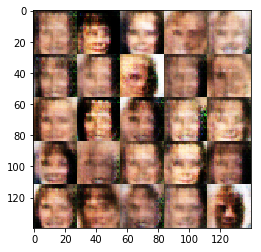

Epoch 1/1... Discriminator Loss: 1.1167... Generator Loss: 1.0265
Epoch 1/1... Discriminator Loss: 1.0928... Generator Loss: 1.0198
Epoch 1/1... Discriminator Loss: 0.9740... Generator Loss: 1.3080
Epoch 1/1... Discriminator Loss: 1.5124... Generator Loss: 0.5546
Epoch 1/1... Discriminator Loss: 1.0976... Generator Loss: 1.2909
Epoch 1/1... Discriminator Loss: 1.2588... Generator Loss: 1.2990
Epoch 1/1... Discriminator Loss: 1.2610... Generator Loss: 1.1128
Epoch 1/1... Discriminator Loss: 1.0567... Generator Loss: 1.7872
Epoch 1/1... Discriminator Loss: 1.1840... Generator Loss: 1.1086
Epoch 1/1... Discriminator Loss: 0.9577... Generator Loss: 1.1496


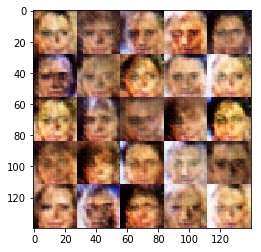

Epoch 1/1... Discriminator Loss: 1.1985... Generator Loss: 1.3732
Epoch 1/1... Discriminator Loss: 1.3961... Generator Loss: 1.4929
Epoch 1/1... Discriminator Loss: 1.1320... Generator Loss: 1.2229
Epoch 1/1... Discriminator Loss: 0.8936... Generator Loss: 1.2545
Epoch 1/1... Discriminator Loss: 1.2471... Generator Loss: 1.6704
Epoch 1/1... Discriminator Loss: 1.2186... Generator Loss: 0.8785
Epoch 1/1... Discriminator Loss: 1.0303... Generator Loss: 1.4955
Epoch 1/1... Discriminator Loss: 1.0665... Generator Loss: 1.1677
Epoch 1/1... Discriminator Loss: 1.0394... Generator Loss: 1.1230
Epoch 1/1... Discriminator Loss: 1.5007... Generator Loss: 0.6760


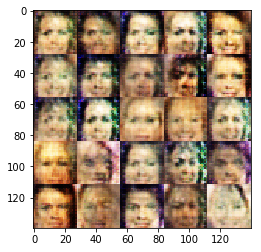

Epoch 1/1... Discriminator Loss: 1.2628... Generator Loss: 0.7361
Epoch 1/1... Discriminator Loss: 1.3590... Generator Loss: 0.5869
Epoch 1/1... Discriminator Loss: 1.2580... Generator Loss: 0.7205
Epoch 1/1... Discriminator Loss: 1.0403... Generator Loss: 1.0600
Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 1.8499
Epoch 1/1... Discriminator Loss: 0.9650... Generator Loss: 1.1406
Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 1.7258
Epoch 1/1... Discriminator Loss: 0.8175... Generator Loss: 1.3983
Epoch 1/1... Discriminator Loss: 1.3129... Generator Loss: 0.8002
Epoch 1/1... Discriminator Loss: 1.0848... Generator Loss: 1.0286


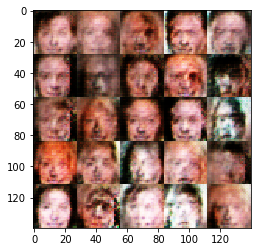

Epoch 1/1... Discriminator Loss: 1.3129... Generator Loss: 0.6792
Epoch 1/1... Discriminator Loss: 1.3504... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.0318... Generator Loss: 1.1477
Epoch 1/1... Discriminator Loss: 1.1455... Generator Loss: 0.9671
Epoch 1/1... Discriminator Loss: 1.1694... Generator Loss: 0.8792
Epoch 1/1... Discriminator Loss: 1.1010... Generator Loss: 0.8862
Epoch 1/1... Discriminator Loss: 1.0503... Generator Loss: 0.9910
Epoch 1/1... Discriminator Loss: 0.9242... Generator Loss: 1.3261
Epoch 1/1... Discriminator Loss: 1.0472... Generator Loss: 1.2768
Epoch 1/1... Discriminator Loss: 1.1584... Generator Loss: 1.0328


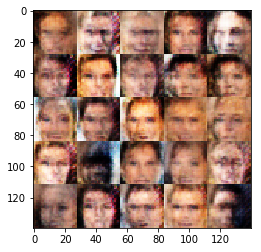

Epoch 1/1... Discriminator Loss: 1.1428... Generator Loss: 1.0122
Epoch 1/1... Discriminator Loss: 0.9789... Generator Loss: 1.5361
Epoch 1/1... Discriminator Loss: 1.3753... Generator Loss: 1.4875
Epoch 1/1... Discriminator Loss: 1.1688... Generator Loss: 1.4720
Epoch 1/1... Discriminator Loss: 1.2277... Generator Loss: 0.9937
Epoch 1/1... Discriminator Loss: 1.2023... Generator Loss: 1.3916
Epoch 1/1... Discriminator Loss: 1.2178... Generator Loss: 0.6835
Epoch 1/1... Discriminator Loss: 1.0203... Generator Loss: 1.1488
Epoch 1/1... Discriminator Loss: 1.2375... Generator Loss: 0.7908
Epoch 1/1... Discriminator Loss: 1.2602... Generator Loss: 0.8254


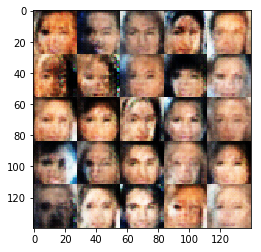

Epoch 1/1... Discriminator Loss: 1.1610... Generator Loss: 0.7683
Epoch 1/1... Discriminator Loss: 1.2357... Generator Loss: 0.8542
Epoch 1/1... Discriminator Loss: 1.1984... Generator Loss: 1.2804
Epoch 1/1... Discriminator Loss: 0.9878... Generator Loss: 0.9669
Epoch 1/1... Discriminator Loss: 1.2451... Generator Loss: 1.8971
Epoch 1/1... Discriminator Loss: 1.1391... Generator Loss: 0.9785
Epoch 1/1... Discriminator Loss: 1.0051... Generator Loss: 1.5812
Epoch 1/1... Discriminator Loss: 0.9691... Generator Loss: 1.2935
Epoch 1/1... Discriminator Loss: 1.1212... Generator Loss: 0.9990
Epoch 1/1... Discriminator Loss: 1.1093... Generator Loss: 1.3496


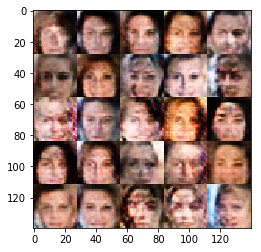

Epoch 1/1... Discriminator Loss: 0.9756... Generator Loss: 1.0525
Epoch 1/1... Discriminator Loss: 1.3542... Generator Loss: 1.1359
Epoch 1/1... Discriminator Loss: 1.1843... Generator Loss: 0.9188
Epoch 1/1... Discriminator Loss: 1.0687... Generator Loss: 0.9561
Epoch 1/1... Discriminator Loss: 1.1004... Generator Loss: 1.3625
Epoch 1/1... Discriminator Loss: 1.5579... Generator Loss: 2.5145
Epoch 1/1... Discriminator Loss: 0.9563... Generator Loss: 1.2056
Epoch 1/1... Discriminator Loss: 1.1767... Generator Loss: 0.9161
Epoch 1/1... Discriminator Loss: 1.3409... Generator Loss: 0.6459
Epoch 1/1... Discriminator Loss: 1.0437... Generator Loss: 1.3995


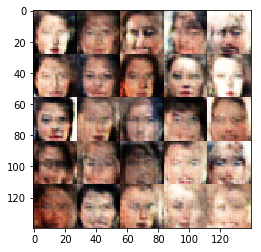

Epoch 1/1... Discriminator Loss: 1.3059... Generator Loss: 0.6197
Epoch 1/1... Discriminator Loss: 0.9646... Generator Loss: 1.3015
Epoch 1/1... Discriminator Loss: 1.1303... Generator Loss: 1.0149
Epoch 1/1... Discriminator Loss: 1.0250... Generator Loss: 1.2723
Epoch 1/1... Discriminator Loss: 1.0133... Generator Loss: 1.3071
Epoch 1/1... Discriminator Loss: 0.9955... Generator Loss: 1.2151
Epoch 1/1... Discriminator Loss: 1.1000... Generator Loss: 1.2131
Epoch 1/1... Discriminator Loss: 1.1070... Generator Loss: 0.8494
Epoch 1/1... Discriminator Loss: 1.3013... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.1529... Generator Loss: 0.7330


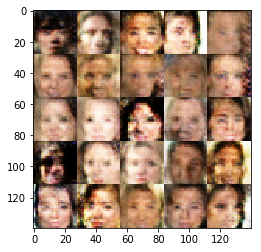

Epoch 1/1... Discriminator Loss: 1.2346... Generator Loss: 0.9319
Epoch 1/1... Discriminator Loss: 1.2986... Generator Loss: 0.6548
Epoch 1/1... Discriminator Loss: 1.2450... Generator Loss: 1.7305
Epoch 1/1... Discriminator Loss: 0.9962... Generator Loss: 1.5199
Epoch 1/1... Discriminator Loss: 0.9884... Generator Loss: 1.0650
Epoch 1/1... Discriminator Loss: 1.4396... Generator Loss: 1.9507
Epoch 1/1... Discriminator Loss: 1.4787... Generator Loss: 0.5215
Epoch 1/1... Discriminator Loss: 1.3578... Generator Loss: 0.5847
Epoch 1/1... Discriminator Loss: 1.1176... Generator Loss: 0.9805
Epoch 1/1... Discriminator Loss: 1.3891... Generator Loss: 0.6945


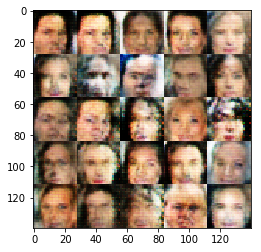

Epoch 1/1... Discriminator Loss: 1.1880... Generator Loss: 0.7893
Epoch 1/1... Discriminator Loss: 1.2206... Generator Loss: 0.7980
Epoch 1/1... Discriminator Loss: 1.2916... Generator Loss: 0.6143
Epoch 1/1... Discriminator Loss: 1.0815... Generator Loss: 0.9886
Epoch 1/1... Discriminator Loss: 1.2268... Generator Loss: 1.0495
Epoch 1/1... Discriminator Loss: 1.0205... Generator Loss: 1.2553
Epoch 1/1... Discriminator Loss: 1.1322... Generator Loss: 0.8373
Epoch 1/1... Discriminator Loss: 1.1883... Generator Loss: 1.1064
Epoch 1/1... Discriminator Loss: 1.2079... Generator Loss: 0.7872
Epoch 1/1... Discriminator Loss: 1.1455... Generator Loss: 1.1021


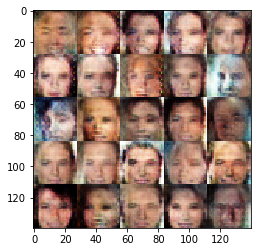

Epoch 1/1... Discriminator Loss: 1.4160... Generator Loss: 2.1812
Epoch 1/1... Discriminator Loss: 1.0770... Generator Loss: 1.2059
Epoch 1/1... Discriminator Loss: 0.9569... Generator Loss: 1.0768
Epoch 1/1... Discriminator Loss: 1.0423... Generator Loss: 1.1699
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 1.8795
Epoch 1/1... Discriminator Loss: 1.3277... Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 1.1619... Generator Loss: 0.7232
Epoch 1/1... Discriminator Loss: 1.0583... Generator Loss: 0.9945
Epoch 1/1... Discriminator Loss: 1.0696... Generator Loss: 1.4235
Epoch 1/1... Discriminator Loss: 1.0631... Generator Loss: 1.2990


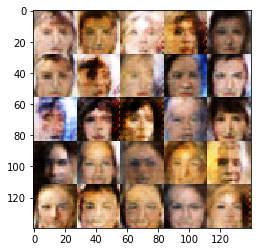

Epoch 1/1... Discriminator Loss: 1.0908... Generator Loss: 1.0852
Epoch 1/1... Discriminator Loss: 1.0874... Generator Loss: 1.0172
Epoch 1/1... Discriminator Loss: 1.0856... Generator Loss: 1.1609
Epoch 1/1... Discriminator Loss: 1.0901... Generator Loss: 1.1344
Epoch 1/1... Discriminator Loss: 1.0840... Generator Loss: 1.8069
Epoch 1/1... Discriminator Loss: 1.0742... Generator Loss: 1.6063
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 0.9043
Epoch 1/1... Discriminator Loss: 1.2612... Generator Loss: 0.6453
Epoch 1/1... Discriminator Loss: 1.1744... Generator Loss: 1.3137
Epoch 1/1... Discriminator Loss: 1.0337... Generator Loss: 1.3806


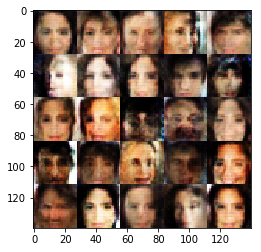

Epoch 1/1... Discriminator Loss: 1.0591... Generator Loss: 1.5297
Epoch 1/1... Discriminator Loss: 1.2498... Generator Loss: 0.6967
Epoch 1/1... Discriminator Loss: 1.0909... Generator Loss: 1.4486
Epoch 1/1... Discriminator Loss: 1.0384... Generator Loss: 1.0575
Epoch 1/1... Discriminator Loss: 1.3253... Generator Loss: 1.4849
Epoch 1/1... Discriminator Loss: 1.1268... Generator Loss: 1.3881
Epoch 1/1... Discriminator Loss: 1.2314... Generator Loss: 0.7577
Epoch 1/1... Discriminator Loss: 1.0956... Generator Loss: 1.1312
Epoch 1/1... Discriminator Loss: 0.9825... Generator Loss: 1.5322
Epoch 1/1... Discriminator Loss: 1.2249... Generator Loss: 0.8091


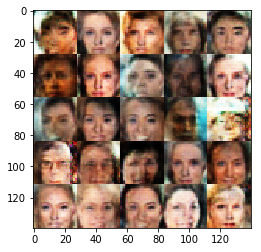

Epoch 1/1... Discriminator Loss: 0.9680... Generator Loss: 1.8210
Epoch 1/1... Discriminator Loss: 1.0874... Generator Loss: 1.2152
Epoch 1/1... Discriminator Loss: 1.1463... Generator Loss: 0.8503
Epoch 1/1... Discriminator Loss: 1.1392... Generator Loss: 1.1537
Epoch 1/1... Discriminator Loss: 1.1527... Generator Loss: 0.9665
Epoch 1/1... Discriminator Loss: 1.0428... Generator Loss: 1.2967
Epoch 1/1... Discriminator Loss: 1.0484... Generator Loss: 0.9277
Epoch 1/1... Discriminator Loss: 1.1746... Generator Loss: 0.8559
Epoch 1/1... Discriminator Loss: 1.0568... Generator Loss: 1.6329
Epoch 1/1... Discriminator Loss: 1.4390... Generator Loss: 0.5352


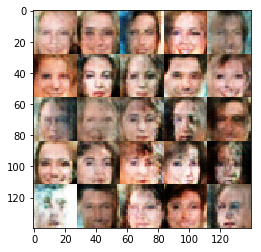

Epoch 1/1... Discriminator Loss: 1.2751... Generator Loss: 0.9231
Epoch 1/1... Discriminator Loss: 1.1131... Generator Loss: 1.4678
Epoch 1/1... Discriminator Loss: 1.1764... Generator Loss: 0.8292
Epoch 1/1... Discriminator Loss: 1.0081... Generator Loss: 1.2594
Epoch 1/1... Discriminator Loss: 1.1681... Generator Loss: 0.7776
Epoch 1/1... Discriminator Loss: 1.3616... Generator Loss: 0.5916
Epoch 1/1... Discriminator Loss: 1.4281... Generator Loss: 0.4984
Epoch 1/1... Discriminator Loss: 1.2185... Generator Loss: 1.3623
Epoch 1/1... Discriminator Loss: 1.2172... Generator Loss: 0.6553
Epoch 1/1... Discriminator Loss: 1.0445... Generator Loss: 0.9327


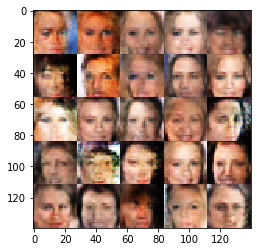

Epoch 1/1... Discriminator Loss: 1.2100... Generator Loss: 0.9596
Epoch 1/1... Discriminator Loss: 1.2213... Generator Loss: 1.4114
Epoch 1/1... Discriminator Loss: 1.1076... Generator Loss: 0.9020


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.